# Blenders


In [1]:
import pandas as pd

blenders = pd.read_csv(
    "MSD-Data-2024/MSOM data external sharing/Machine data/Blenders.csv"
)
blenders

/tmp/ipykernel_3102527/3987724740.py:3: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  blenders = pd.read_csv(


,TimeStamp,Massflow Blender 1,Massflow Blender 2,Blend Potency Blender 1,Blend Potency Blender 2,OOS Concentration at Blender 1 inlet,OOS Concentration at Blender 2 inlet
0,01/12/2018 08:43,0,0,100,100,0,0
1,01/12/2018 08:43,0,0,100,100,0,0
2,01/12/2018 08:43,0,0,100,100,0,0
3,01/12/2018 08:43,0,0,100,100,0,0
4,01/12/2018 08:43,0,0,100,100,0,0
...,...,...,...,...,...,...,...
439841,17/01/2018 11:01:09,54.1476,55,99.5506,99.7853,0.0,0.0
439842,17/01/2018 11:01:10,54.8537,55,99.5382,99.7768,0.0,0.0
439843,17/01/2018 11:01:11,53.8082,55,99.5203,99.7685,0.0,0.0
439844,17/01/2018 11:01:12,54.4691,55,99.4972,99.7673,0.0,0.0


## Timestamp column

In [2]:
blenders["TimeStamp"].astype(str).str[:10].unique()

array(['01/12/2018', '13/01/2018', 'TimeStamp', '14/01/2018',
       '15/01/2018', '16/01/2018', '17/01/2018'], dtype=object)

In [3]:
def replace_date_only(timestamp):
    if isinstance(timestamp, str) and "01/12/2018" in timestamp:
        return timestamp.replace("01/12/2018", "12/01/2018")
    return timestamp


# Apply the function to the 'TimeStamp' column
blenders["TimeStamp"] = blenders["TimeStamp"].apply(replace_date_only)
blenders

,TimeStamp,Massflow Blender 1,Massflow Blender 2,Blend Potency Blender 1,Blend Potency Blender 2,OOS Concentration at Blender 1 inlet,OOS Concentration at Blender 2 inlet
0,12/01/2018 08:43,0,0,100,100,0,0
1,12/01/2018 08:43,0,0,100,100,0,0
2,12/01/2018 08:43,0,0,100,100,0,0
3,12/01/2018 08:43,0,0,100,100,0,0
4,12/01/2018 08:43,0,0,100,100,0,0
...,...,...,...,...,...,...,...
439841,17/01/2018 11:01:09,54.1476,55,99.5506,99.7853,0.0,0.0
439842,17/01/2018 11:01:10,54.8537,55,99.5382,99.7768,0.0,0.0
439843,17/01/2018 11:01:11,53.8082,55,99.5203,99.7685,0.0,0.0
439844,17/01/2018 11:01:12,54.4691,55,99.4972,99.7673,0.0,0.0


## Types of all columns

In [4]:
blenders.dtypes

TimeStamp                               object
Massflow Blender 1                      object
Massflow Blender 2                      object
Blend Potency Blender 1                 object
Blend Potency Blender 2                 object
OOS Concentration at Blender 1 inlet    object
OOS Concentration at Blender 2 inlet    object
dtype: object

In [5]:
len(blenders["TimeStamp"][439845])

19

In [6]:
blenders["TimeStamp"] = blenders["TimeStamp"].apply(
    lambda x: (
        pd.to_datetime(x, dayfirst=True, errors="ignore")
        if isinstance(x, str) and len(x) != 16
        else pd.to_datetime(x, dayfirst=True, errors="coerce")
    )
)

# blenders["TimeStamp"] = pd.to_datetime(
#     blenders["TimeStamp"], format="%d/%m/%Y %H:%M:%S"
# )
blenders

/tmp/ipykernel_3102527/1054406538.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  pd.to_datetime(x, dayfirst=True, errors="ignore")
/tmp/ipykernel_3102527/1054406538.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  pd.to_datetime(x, dayfirst=True, errors="ignore")
/tmp/ipykernel_3102527/1054406538.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  pd.to_datetime(x, dayfirst=True, errors="ignore")


,TimeStamp,Massflow Blender 1,Massflow Blender 2,Blend Potency Blender 1,Blend Potency Blender 2,OOS Concentration at Blender 1 inlet,OOS Concentration at Blender 2 inlet
0,2018-01-12 08:43:00,0,0,100,100,0,0
1,2018-01-12 08:43:00,0,0,100,100,0,0
2,2018-01-12 08:43:00,0,0,100,100,0,0
3,2018-01-12 08:43:00,0,0,100,100,0,0
4,2018-01-12 08:43:00,0,0,100,100,0,0
...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:09,54.1476,55,99.5506,99.7853,0.0,0.0
439842,2018-01-17 11:01:10,54.8537,55,99.5382,99.7768,0.0,0.0
439843,2018-01-17 11:01:11,53.8082,55,99.5203,99.7685,0.0,0.0
439844,2018-01-17 11:01:12,54.4691,55,99.4972,99.7673,0.0,0.0


In [7]:
blenders.dtypes

TimeStamp                               object
Massflow Blender 1                      object
Massflow Blender 2                      object
Blend Potency Blender 1                 object
Blend Potency Blender 2                 object
OOS Concentration at Blender 1 inlet    object
OOS Concentration at Blender 2 inlet    object
dtype: object

In [8]:
blenders_copy = blenders.copy()

In [9]:
columns_to_convert = [
    "Massflow Blender 1",
    "Massflow Blender 2",
    "Blend Potency Blender 1",
    "Blend Potency Blender 2",
    "OOS Concentration at Blender 1 inlet",
    "OOS Concentration at Blender 2 inlet",
]

# Apply pd.to_numeric to each of these columns, setting errors='coerce' to handle any conversion issues
blenders_copy[columns_to_convert] = blenders_copy[columns_to_convert].apply(
    pd.to_numeric, errors="coerce"
)

## Clean Blenders

In [10]:
blenders = blenders_copy
blenders

,TimeStamp,Massflow Blender 1,Massflow Blender 2,Blend Potency Blender 1,Blend Potency Blender 2,OOS Concentration at Blender 1 inlet,OOS Concentration at Blender 2 inlet
0,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
1,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
2,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
3,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
4,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:09,54.1476,55.0,99.5506,99.7853,0.0,4.220000e-38
439842,2018-01-17 11:01:10,54.8537,55.0,99.5382,99.7768,0.0,4.120000e-38
439843,2018-01-17 11:01:11,53.8082,55.0,99.5203,99.7685,0.0,4.020000e-38
439844,2018-01-17 11:01:12,54.4691,55.0,99.4972,99.7673,0.0,4.020000e-38


In [11]:
blenders_copy["TimeStamp"] = pd.to_datetime(blenders_copy["TimeStamp"], errors="coerce")
blenders_copy

,TimeStamp,Massflow Blender 1,Massflow Blender 2,Blend Potency Blender 1,Blend Potency Blender 2,OOS Concentration at Blender 1 inlet,OOS Concentration at Blender 2 inlet
0,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
1,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
2,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
3,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
4,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:09,54.1476,55.0,99.5506,99.7853,0.0,4.220000e-38
439842,2018-01-17 11:01:10,54.8537,55.0,99.5382,99.7768,0.0,4.120000e-38
439843,2018-01-17 11:01:11,53.8082,55.0,99.5203,99.7685,0.0,4.020000e-38
439844,2018-01-17 11:01:12,54.4691,55.0,99.4972,99.7673,0.0,4.020000e-38


In [12]:
blenders_copy[blenders_copy["TimeStamp"].isna()]
blenders_copy_clean = blenders_copy.dropna(subset=["TimeStamp"])

In [13]:
blenders_copy_clean

,TimeStamp,Massflow Blender 1,Massflow Blender 2,Blend Potency Blender 1,Blend Potency Blender 2,OOS Concentration at Blender 1 inlet,OOS Concentration at Blender 2 inlet
0,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
1,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
2,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
3,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
4,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:09,54.1476,55.0,99.5506,99.7853,0.0,4.220000e-38
439842,2018-01-17 11:01:10,54.8537,55.0,99.5382,99.7768,0.0,4.120000e-38
439843,2018-01-17 11:01:11,53.8082,55.0,99.5203,99.7685,0.0,4.020000e-38
439844,2018-01-17 11:01:12,54.4691,55.0,99.4972,99.7673,0.0,4.020000e-38


In [14]:
blenders_copy_clean["TimeStamp"] = pd.to_datetime(blenders_copy_clean["TimeStamp"])
blenders_copy_clean

/tmp/ipykernel_3102527/2919507027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blenders_copy_clean["TimeStamp"] = pd.to_datetime(blenders_copy_clean["TimeStamp"])


,TimeStamp,Massflow Blender 1,Massflow Blender 2,Blend Potency Blender 1,Blend Potency Blender 2,OOS Concentration at Blender 1 inlet,OOS Concentration at Blender 2 inlet
0,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
1,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
2,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
3,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
4,2018-01-12 08:43:00,0.0000,0.0,100.0000,100.0000,0.0,0.000000e+00
...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:09,54.1476,55.0,99.5506,99.7853,0.0,4.220000e-38
439842,2018-01-17 11:01:10,54.8537,55.0,99.5382,99.7768,0.0,4.120000e-38
439843,2018-01-17 11:01:11,53.8082,55.0,99.5203,99.7685,0.0,4.020000e-38
439844,2018-01-17 11:01:12,54.4691,55.0,99.4972,99.7673,0.0,4.020000e-38


In [15]:
blenders_copy_clean.dtypes

TimeStamp                               datetime64[ns]
Massflow Blender 1                             float64
Massflow Blender 2                             float64
Blend Potency Blender 1                        float64
Blend Potency Blender 2                        float64
OOS Concentration at Blender 1 inlet           float64
OOS Concentration at Blender 2 inlet           float64
dtype: object

In [81]:
# blenders_copy_clean.to_csv("data/processed/blenders.csv", index=False)

## Visualize

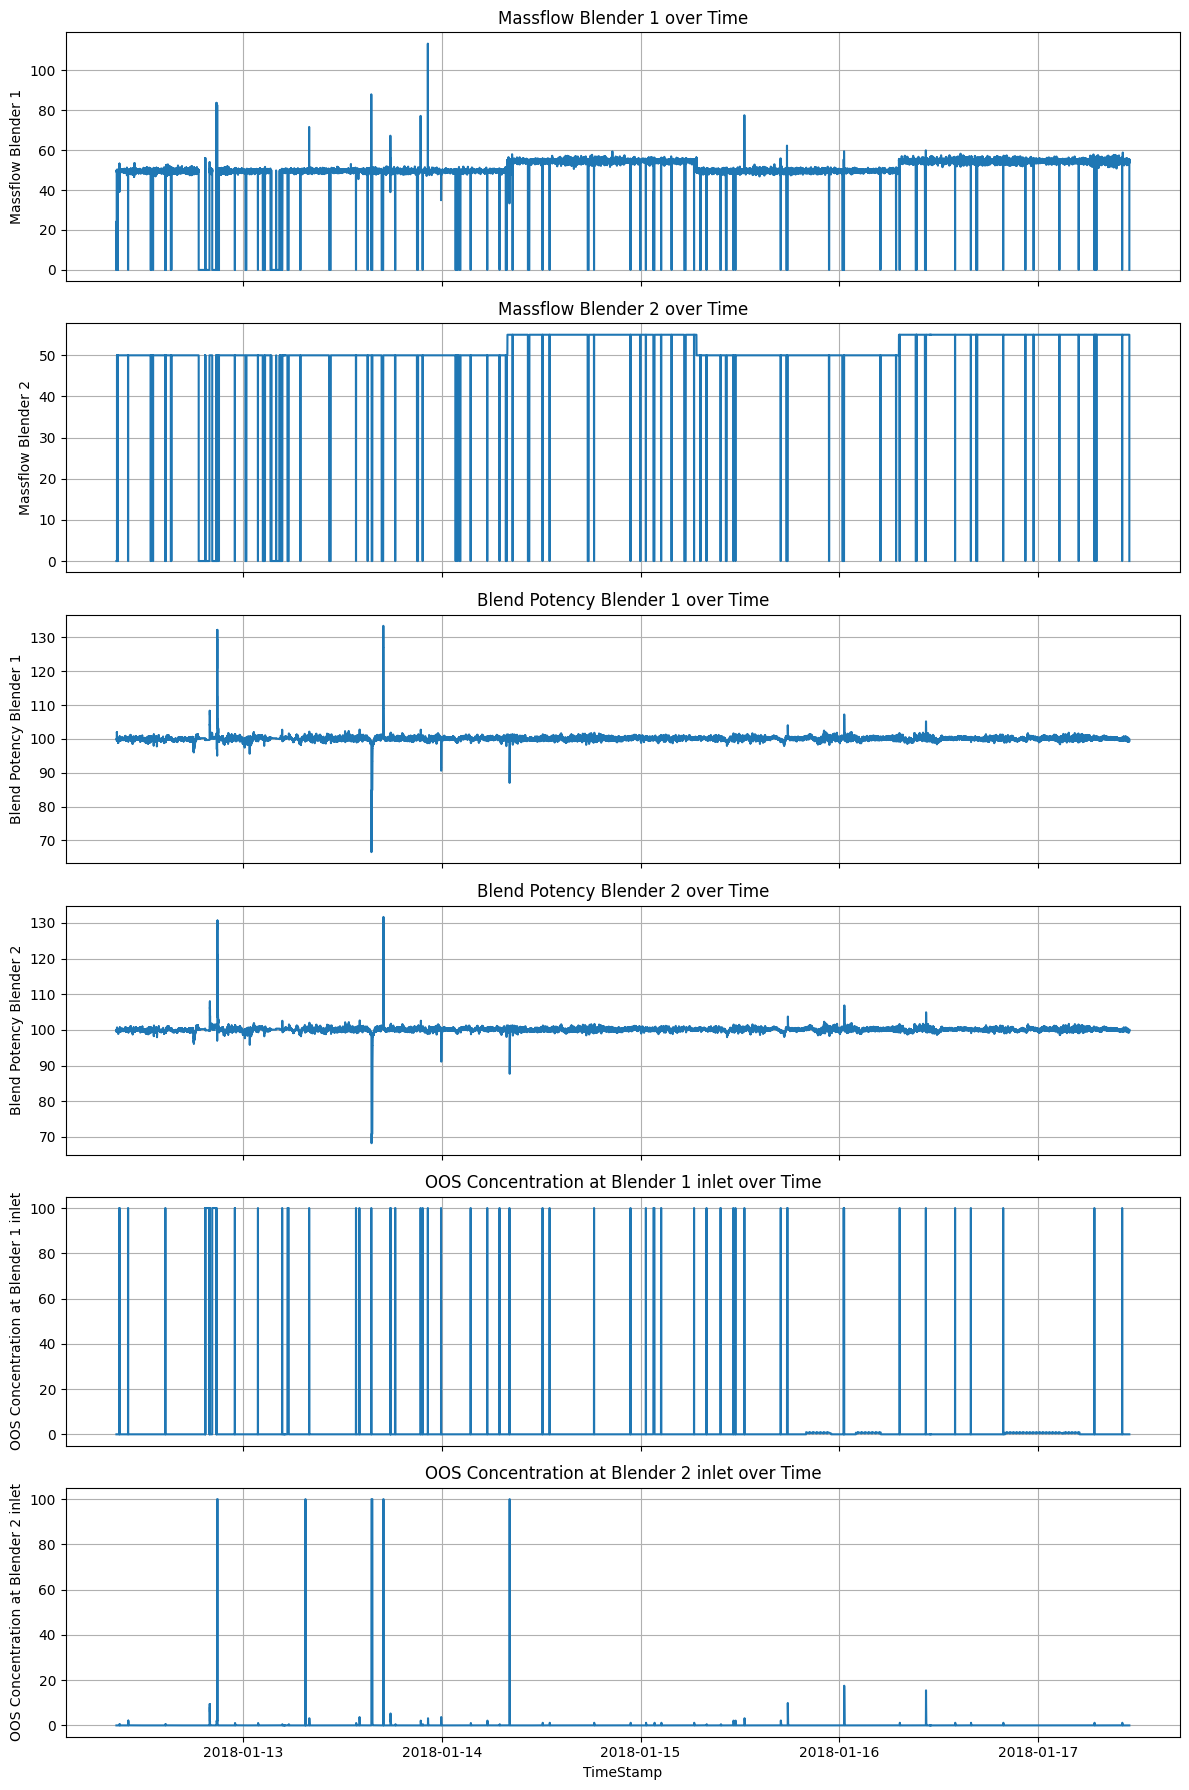

In [16]:
import matplotlib.pyplot as plt

# Plotting each column over TimeStamp
fig, axs = plt.subplots(6, 1, figsize=(12, 18), sharex=True)

columns = [
    "Massflow Blender 1",
    "Massflow Blender 2",
    "Blend Potency Blender 1",
    "Blend Potency Blender 2",
    "OOS Concentration at Blender 1 inlet",
    "OOS Concentration at Blender 2 inlet",
]

for i, column in enumerate(columns):
    axs[i].plot(blenders_copy["TimeStamp"], blenders_copy[column])
    axs[i].set_title(f"{column} over Time")
    axs[i].set_ylabel(column)
    axs[i].grid(True)

plt.xlabel("TimeStamp")
plt.tight_layout()
plt.show()

# Humidity


In [17]:
humidity = pd.read_csv(
    "MSD-Data-2024/MSOM data external sharing/Machine data/Humidity.csv", header=1
)
humidity

,TimeStamp,Unit,Value,Date/Time,Unit.1,Value.1
0,12/01/2018 08:13,%RH,44.242,12/01/2018 08:15,%RH,34.140
1,12/01/2018 08:28,%RH,44.242,12/01/2018 08:30,%RH,33.485
2,12/01/2018 08:43,%RH,43.605,12/01/2018 08:45,%RH,33.485
3,12/01/2018 08:58,%RH,43.605,12/01/2018 09:00,%RH,31.511
4,12/01/2018 09:13,%RH,43.605,12/01/2018 09:15,%RH,32.829
...,...,...,...,...,...,...
487,17/01/2018 09:58,%RH,29.869,17/01/2018 10:00,%RH,8.896
488,17/01/2018 10:13,%RH,29.869,17/01/2018 10:15,%RH,8.896
489,17/01/2018 10:28,%RH,29.869,17/01/2018 10:30,%RH,11.020
490,17/01/2018 10:43,%RH,29.869,17/01/2018 10:45,%RH,9.606


## All types of humidity

In [18]:
humidity.dtypes

TimeStamp     object
Unit          object
Value        float64
Date/Time     object
Unit.1        object
Value.1      float64
dtype: object

## Clean Humidity

In [19]:
# Converting the TimeStamp and Date/Time columns to datetime format
humidity["TimeStamp"] = pd.to_datetime(humidity["TimeStamp"], dayfirst=True)
humidity["Date/Time"] = pd.to_datetime(humidity["Date/Time"], dayfirst=True)
# Splitting the DataFrame into two: one for feeders' humidity and one for tablet press
humidity_feeders = humidity[["TimeStamp", "Unit", "Value"]]
humidity_tablet_press = humidity[["Date/Time", "Unit.1", "Value.1"]]

# Renaming columns to be more descriptive
humidity_feeders.columns = ["Timestamp", "Unit", "Feeder_Humidity"]
humidity_tablet_press.columns = ["Timestamp", "Unit", "Tablet_Press_Humidity"]

In [ ]:
# humidity_feeders.to_csv("data/processed/humidity_feeders.csv", index=False)
# humidity_tablet_press.to_csv("data/processed/humidity_tablet_press.csv", index=False)

## Visualize

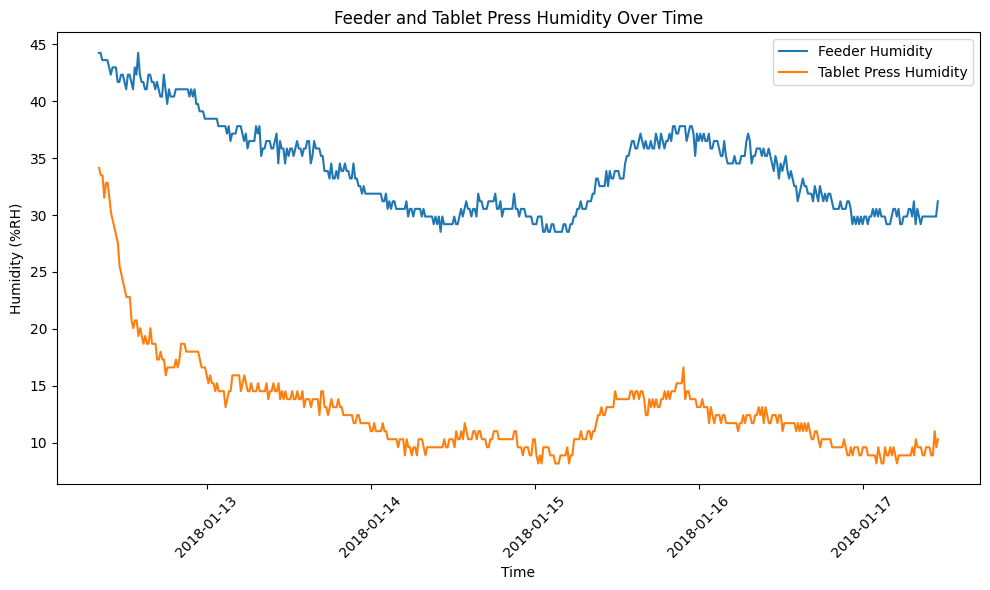

In [20]:
plt.figure(figsize=(10, 6))

# Plot for Feeders' Humidity
plt.plot(
    humidity_feeders["Timestamp"],
    humidity_feeders["Feeder_Humidity"],
    label="Feeder Humidity",
)

# Plot for Tablet Press Humidity
plt.plot(
    humidity_tablet_press["Timestamp"],
    humidity_tablet_press["Tablet_Press_Humidity"],
    label="Tablet Press Humidity",
)

# Labels and Title
plt.xlabel("Time")
plt.ylabel("Humidity (%RH)")
plt.title("Feeder and Tablet Press Humidity Over Time")
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# Feeder 1


In [11]:
# read csv
import pandas as pd

fd1 = pd.read_csv(
    "MSD-Data-2024/MSOM data external sharing/Machine data/LiW Feeders 1.csv"
)
fd1 = fd1.loc[:, ~fd1.columns.str.contains("^Unnamed")]

/tmp/ipykernel_4089070/583808541.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  fd1 = pd.read_csv(


In [12]:
fd1

,TimeStamp,Feed Factor PD1,Feed Factor PD2,Feed Factor PD3,Feed Factor PD4,Feed Factor PD5,Feed Factor PD7,Screw RPM PD1,Screw RPM PD2,Screw RPM PD3,...,VolMode PD7,Massflow PD 1,Massflow PD 2,Massflow PD 3,Massflow PD 4,Massflow PD 5,Massflow PD 7,% PD1,% PD2,% PD3
0,01/12/2018 08:43,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01/12/2018 08:43,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01/12/2018 08:43,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01/12/2018 08:43,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01/12/2018 08:43,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,17/01/2018 11:01,1.273,1.7314,1.0819,1.3218,1.1042,0.80946,203.6408,152.4236,83.4518,...,0,15.6413,15.8925,5.2368,15.5156,1.6343,0.56505,29.0775,29.0147,9.6503
439842,17/01/2018 11:01,1.2785,1.7333,1.0896,1.3273,1.1048,0.80929,203.3338,153.1399,83.196,...,0,16.0361,15.9505,5.4233,15.7423,1.6385,0.56462,28.2951,28.9645,9.5506
439843,17/01/2018 11:01,1.259,1.7341,1.0873,1.3227,1.1057,0.81131,207.0689,153.2423,84.9356,...,0,15.163,15.9726,5.4152,15.614,1.6414,0.56441,27.842,29.0471,9.83
439844,17/01/2018 11:01,1.2684,1.7312,1.0874,1.3188,1.1067,0.81018,205.4316,152.6283,84.3728,...,0,15.7303,15.9146,5.4533,15.7176,1.6475,0.56407,28.6072,28.938,9.9167


In [31]:
fd1.dtypes

TimeStamp          datetime64[ns]
Feed Factor PD1            object
Feed Factor PD2            object
Feed Factor PD3            object
Feed Factor PD4            object
Feed Factor PD5            object
Feed Factor PD7            object
Screw RPM PD1              object
Screw RPM PD2              object
Screw RPM PD3              object
Screw RPM PD4              object
Screw RPM PD5              object
Screw RPM PD7              object
VolMode PD1                object
VolMode PD2                object
VolMode PD3                object
VolMode PD4                object
VolMode PD5                object
VolMode PD7                object
Massflow PD 1              object
Massflow PD 2              object
Massflow PD 3              object
Massflow PD 4              object
Massflow PD 5              object
Massflow PD 7              object
%  PD1                     object
%  PD2                     object
%  PD3                     object
dtype: object

In [14]:
fd1["TimeStamp"].astype(str).str[:10].unique()

array(['01/12/2018', '13/01/2018', 'TimeStamp', '14/01/2018',
       '15/01/2018', '16/01/2018', '17/01/2018'], dtype=object)

In [15]:
def replace_date_only(timestamp):
    if isinstance(timestamp, str) and "01/12/2018" in timestamp:
        return timestamp.replace("01/12/2018", "12/01/2018")
    return timestamp


# Apply the function to the 'TimeStamp' column
fd1["TimeStamp"] = fd1["TimeStamp"].apply(replace_date_only)
fd1

,TimeStamp,Feed Factor PD1,Feed Factor PD2,Feed Factor PD3,Feed Factor PD4,Feed Factor PD5,Feed Factor PD7,Screw RPM PD1,Screw RPM PD2,Screw RPM PD3,...,VolMode PD7,Massflow PD 1,Massflow PD 2,Massflow PD 3,Massflow PD 4,Massflow PD 5,Massflow PD 7,% PD1,% PD2,% PD3
0,12/01/2018 08:43,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12/01/2018 08:43,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12/01/2018 08:43,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12/01/2018 08:43,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/01/2018 08:43,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,17/01/2018 11:01,1.273,1.7314,1.0819,1.3218,1.1042,0.80946,203.6408,152.4236,83.4518,...,0,15.6413,15.8925,5.2368,15.5156,1.6343,0.56505,29.0775,29.0147,9.6503
439842,17/01/2018 11:01,1.2785,1.7333,1.0896,1.3273,1.1048,0.80929,203.3338,153.1399,83.196,...,0,16.0361,15.9505,5.4233,15.7423,1.6385,0.56462,28.2951,28.9645,9.5506
439843,17/01/2018 11:01,1.259,1.7341,1.0873,1.3227,1.1057,0.81131,207.0689,153.2423,84.9356,...,0,15.163,15.9726,5.4152,15.614,1.6414,0.56441,27.842,29.0471,9.83
439844,17/01/2018 11:01,1.2684,1.7312,1.0874,1.3188,1.1067,0.81018,205.4316,152.6283,84.3728,...,0,15.7303,15.9146,5.4533,15.7176,1.6475,0.56407,28.6072,28.938,9.9167


In [16]:
fd1["TimeStamp"] = fd1["TimeStamp"].apply(
    lambda x: (
        pd.to_datetime(x, dayfirst=True, errors="ignore")
        if isinstance(x, str) and len(x) != 16
        else pd.to_datetime(x, dayfirst=True, errors="coerce")
    )
)
fd1["TimeStamp"] = pd.to_datetime(fd1["TimeStamp"], errors="coerce")
fd1 = fd1.dropna(subset=["TimeStamp"])
fd1

,TimeStamp,Feed Factor PD1,Feed Factor PD2,Feed Factor PD3,Feed Factor PD4,Feed Factor PD5,Feed Factor PD7,Screw RPM PD1,Screw RPM PD2,Screw RPM PD3,...,VolMode PD7,Massflow PD 1,Massflow PD 2,Massflow PD 3,Massflow PD 4,Massflow PD 5,Massflow PD 7,% PD1,% PD2,% PD3
0,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:00,1.273,1.7314,1.0819,1.3218,1.1042,0.80946,203.6408,152.4236,83.4518,...,0,15.6413,15.8925,5.2368,15.5156,1.6343,0.56505,29.0775,29.0147,9.6503
439842,2018-01-17 11:01:00,1.2785,1.7333,1.0896,1.3273,1.1048,0.80929,203.3338,153.1399,83.196,...,0,16.0361,15.9505,5.4233,15.7423,1.6385,0.56462,28.2951,28.9645,9.5506
439843,2018-01-17 11:01:00,1.259,1.7341,1.0873,1.3227,1.1057,0.81131,207.0689,153.2423,84.9356,...,0,15.163,15.9726,5.4152,15.614,1.6414,0.56441,27.842,29.0471,9.83
439844,2018-01-17 11:01:00,1.2684,1.7312,1.0874,1.3188,1.1067,0.81018,205.4316,152.6283,84.3728,...,0,15.7303,15.9146,5.4533,15.7176,1.6475,0.56407,28.6072,28.938,9.9167


In [17]:
fd1.dtypes

TimeStamp          datetime64[ns]
Feed Factor PD1            object
Feed Factor PD2            object
Feed Factor PD3            object
Feed Factor PD4            object
Feed Factor PD5            object
Feed Factor PD7            object
Screw RPM PD1              object
Screw RPM PD2              object
Screw RPM PD3              object
Screw RPM PD4              object
Screw RPM PD5              object
Screw RPM PD7              object
VolMode PD1                object
VolMode PD2                object
VolMode PD3                object
VolMode PD4                object
VolMode PD5                object
VolMode PD7                object
Massflow PD 1              object
Massflow PD 2              object
Massflow PD 3              object
Massflow PD 4              object
Massflow PD 5              object
Massflow PD 7              object
%  PD1                     object
%  PD2                     object
%  PD3                     object
dtype: object

In [18]:
# fd1.to_csv("data/processed/feeders_1.csv", index=False)

In [12]:
fd1_copy = fd1.copy()

In [32]:
volmode_columns = [
    "VolMode PD1",
    "VolMode PD2",
    "VolMode PD3",
    "VolMode PD4",
    "VolMode PD5",
    "VolMode PD7",
]
columns_to_convert = fd1.columns.difference(["TimeStamp"] + volmode_columns)

fd1_copy[columns_to_convert] = fd1_copy[columns_to_convert].apply(
    pd.to_numeric, errors="coerce"
)

fd1[columns_to_convert] = fd1[columns_to_convert].apply(pd.to_numeric, errors="coerce")
fd1[volmode_columns] = fd1[volmode_columns].applymap(lambda x: 1 if x == "On" else 0)


# Check the result
fd1_copy.dtypes

/tmp/ipykernel_3102527/1655508122.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd1[columns_to_convert] = fd1[columns_to_convert].apply(pd.to_numeric, errors="coerce")
/tmp/ipykernel_3102527/1655508122.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fd1[volmode_columns] = fd1[volmode_columns].applymap(lambda x: 1 if x == "On" else 0)
/tmp/ipykernel_3102527/1655508122.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd1[volmode_columns] = fd1[volmode_colu

TimeStamp          datetime64[ns]
Feed Factor PD1           float64
Feed Factor PD2           float64
Feed Factor PD3           float64
Feed Factor PD4           float64
Feed Factor PD5           float64
Feed Factor PD7           float64
Screw RPM PD1             float64
Screw RPM PD2             float64
Screw RPM PD3             float64
Screw RPM PD4             float64
Screw RPM PD5             float64
Screw RPM PD7             float64
VolMode PD1                object
VolMode PD2                object
VolMode PD3                object
VolMode PD4                object
VolMode PD5                object
VolMode PD7                object
Massflow PD 1             float64
Massflow PD 2             float64
Massflow PD 3             float64
Massflow PD 4             float64
Massflow PD 5             float64
Massflow PD 7             float64
%  PD1                    float64
%  PD2                    float64
%  PD3                    float64
dtype: object

In [33]:
fd1_copy

,TimeStamp,Feed Factor PD1,Feed Factor PD2,Feed Factor PD3,Feed Factor PD4,Feed Factor PD5,Feed Factor PD7,Screw RPM PD1,Screw RPM PD2,Screw RPM PD3,...,VolMode PD7,Massflow PD 1,Massflow PD 2,Massflow PD 3,Massflow PD 4,Massflow PD 5,Massflow PD 7,% PD1,% PD2,% PD3
0,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000
1,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000
2,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000
3,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000
4,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:00,1.2730,1.7314,1.0819,1.3218,1.1042,0.80946,203.6408,152.4236,83.4518,...,0,15.6413,15.8925,5.2368,15.5156,1.6343,0.56505,29.0775,29.0147,9.6503
439842,2018-01-17 11:01:00,1.2785,1.7333,1.0896,1.3273,1.1048,0.80929,203.3338,153.1399,83.1960,...,0,16.0361,15.9505,5.4233,15.7423,1.6385,0.56462,28.2951,28.9645,9.5506
439843,2018-01-17 11:01:00,1.2590,1.7341,1.0873,1.3227,1.1057,0.81131,207.0689,153.2423,84.9356,...,0,15.1630,15.9726,5.4152,15.6140,1.6414,0.56441,27.8420,29.0471,9.8300
439844,2018-01-17 11:01:00,1.2684,1.7312,1.0874,1.3188,1.1067,0.81018,205.4316,152.6283,84.3728,...,0,15.7303,15.9146,5.4533,15.7176,1.6475,0.56407,28.6072,28.9380,9.9167


In [34]:
fd1_copy.isna().sum()

TimeStamp          0
Feed Factor PD1    0
Feed Factor PD2    0
Feed Factor PD3    0
Feed Factor PD4    0
Feed Factor PD5    0
Feed Factor PD7    0
Screw RPM PD1      0
Screw RPM PD2      0
Screw RPM PD3      0
Screw RPM PD4      0
Screw RPM PD5      0
Screw RPM PD7      0
VolMode PD1        0
VolMode PD2        0
VolMode PD3        0
VolMode PD4        0
VolMode PD5        0
VolMode PD7        0
Massflow PD 1      0
Massflow PD 2      0
Massflow PD 3      0
Massflow PD 4      0
Massflow PD 5      0
Massflow PD 7      0
%  PD1             0
%  PD2             0
%  PD3             0
dtype: int64

## Timestamp group


In [35]:
TimeStamp_group = fd1_copy.groupby("TimeStamp").count()
TimeStamp_group

,Feed Factor PD1,Feed Factor PD2,Feed Factor PD3,Feed Factor PD4,Feed Factor PD5,Feed Factor PD7,Screw RPM PD1,Screw RPM PD2,Screw RPM PD3,Screw RPM PD4,...,VolMode PD7,Massflow PD 1,Massflow PD 2,Massflow PD 3,Massflow PD 4,Massflow PD 5,Massflow PD 7,% PD1,% PD2,% PD3
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2018-01-12 08:43:00,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
2018-01-12 08:44:00,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
2018-01-12 08:45:00,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
2018-01-12 08:46:00,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
2018-01-12 08:47:00,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-17 10:57:00,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
2018-01-17 10:58:00,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
2018-01-17 10:59:00,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60


# Feeder 2


In [28]:
# read csv
import pandas as pd

fd2 = pd.read_csv(
    "MSD-Data-2024/MSOM data external sharing/Machine data/LiW Feeders 2.csv"
)
fd2 = fd2.loc[:, ~fd2.columns.str.contains("^Unnamed")]
fd2

/tmp/ipykernel_4089070/2023120719.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  fd2 = pd.read_csv(


,% PD4,% PD5,% PD7,Estimated weight IBC PS1,Estimated weight IBC PS2,Estimated weight IBC PS3,Estimated weight IBC PS4,Estimated weight IBC PS5,Estimated weight IBC PS7,RefAct PD1,...,Net Weight PD3,Net Weight PD4,Net Weight PD5,Net Weight PD7,Totalizer PD1,Totalizer PD2,Totalizer PD3,Totalizer PD4,Totalizer PD5,Totalizer PD7
0,0.0,0.0,0.0,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.5205,0.8823,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
1,0.0,0.0,0.0,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.52045,0.88225,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
2,0.0,0.0,0.0,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.5205,0.8823,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
3,0.0,0.0,0.0,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.5205,0.8823,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
4,0.0,0.0,0.0,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.5205,0.88225,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,28.411,2.9679,1.0281,2041.4215,9280.8457,89.7484,4143.6841,178.8231,81.5899,0,...,0.42515,0.4136,0.6818,0.38745,754.1812,759.0052,266.002,758.0178,131.072,65.536
439842,28.4275,2.9726,1.0272,2041.4215,9280.8457,89.7484,4143.6841,178.8231,81.5899,0,...,0.4235,0.40975,0.6813,0.38775,754.1844,759.0084,266.002,758.0245,131.072,65.536
439843,28.3322,2.9815,1.0264,2041.4215,9280.8457,89.7484,4143.6841,178.8231,81.5899,0,...,0.4223,0.4057,0.68095,0.38745,754.1912,759.0153,266.002,758.0314,131.072,65.536
439844,28.5676,2.9908,1.0258,2041.4215,9280.8457,89.7484,4143.6841,178.8231,81.5899,0,...,0.4203,0.40055,0.6803,0.387,754.1981,759.0221,266.002,758.0385,131.072,65.536


In [29]:
# 73013， 353383
rows_to_remove = [73013, 353383]
# Removing rows based on the provided indices
fd2 = fd2.drop(rows_to_remove)
fd2

,% PD4,% PD5,% PD7,Estimated weight IBC PS1,Estimated weight IBC PS2,Estimated weight IBC PS3,Estimated weight IBC PS4,Estimated weight IBC PS5,Estimated weight IBC PS7,RefAct PD1,...,Net Weight PD3,Net Weight PD4,Net Weight PD5,Net Weight PD7,Totalizer PD1,Totalizer PD2,Totalizer PD3,Totalizer PD4,Totalizer PD5,Totalizer PD7
0,0.0,0.0,0.0,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.5205,0.8823,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
1,0.0,0.0,0.0,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.52045,0.88225,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
2,0.0,0.0,0.0,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.5205,0.8823,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
3,0.0,0.0,0.0,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.5205,0.8823,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
4,0.0,0.0,0.0,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.5205,0.88225,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,28.411,2.9679,1.0281,2041.4215,9280.8457,89.7484,4143.6841,178.8231,81.5899,0,...,0.42515,0.4136,0.6818,0.38745,754.1812,759.0052,266.002,758.0178,131.072,65.536
439842,28.4275,2.9726,1.0272,2041.4215,9280.8457,89.7484,4143.6841,178.8231,81.5899,0,...,0.4235,0.40975,0.6813,0.38775,754.1844,759.0084,266.002,758.0245,131.072,65.536
439843,28.3322,2.9815,1.0264,2041.4215,9280.8457,89.7484,4143.6841,178.8231,81.5899,0,...,0.4223,0.4057,0.68095,0.38745,754.1912,759.0153,266.002,758.0314,131.072,65.536
439844,28.5676,2.9908,1.0258,2041.4215,9280.8457,89.7484,4143.6841,178.8231,81.5899,0,...,0.4203,0.40055,0.6803,0.387,754.1981,759.0221,266.002,758.0385,131.072,65.536


In [30]:
fd2.dtypes

%  PD4                      object
%  PD5                      object
%  PD7                      object
Estimated weight IBC PS1    object
Estimated weight IBC PS2    object
Estimated weight IBC PS3    object
Estimated weight IBC PS4    object
Estimated weight IBC PS5    object
Estimated weight IBC PS7    object
RefAct PD1                  object
RefAct PD2                  object
RefAct PD3                  object
RefAct PD4                  object
RefAct PD5                  object
RefAct PD7                  object
Net Weight PD1              object
Net Weight PD2              object
Net Weight PD3              object
Net Weight PD4              object
Net Weight PD5              object
Net Weight PD7              object
Totalizer PD1               object
Totalizer PD2               object
Totalizer PD3               object
Totalizer PD4               object
Totalizer PD5               object
Totalizer PD7               object
dtype: object

In [25]:
fd2.columns

Index(['%  PD4', '%  PD5', '%  PD7', 'Estimated weight IBC PS1',
       'Estimated weight IBC PS2', 'Estimated weight IBC PS3',
       'Estimated weight IBC PS4', 'Estimated weight IBC PS5',
       'Estimated weight IBC PS7', 'RefAct PD1', 'RefAct PD2', 'RefAct PD3',
       'RefAct PD4', 'RefAct PD5', 'RefAct PD7', 'Net Weight PD1',
       'Net Weight PD2', 'Net Weight PD3', 'Net Weight PD4', 'Net Weight PD5',
       'Net Weight PD7', 'Totalizer PD1', 'Totalizer PD2', 'Totalizer PD3',
       'Totalizer PD4', 'Totalizer PD5', 'Totalizer PD7'],
      dtype='object')

In [16]:
fd2["RefAct PD1"].unique()

array([0, 1, '0', '1', 'CB_FdrDtaPos1.RefAct', 14.25, '14.25', 15.675],
      dtype=object)

In [ ]:
# fd2.to_csv("data/processed/feeders_2.csv", index=False)

In [33]:
unique_values = pd.Series(fd2["RefAct PD7"])
value_counts = unique_values.value_counts()
value_counts

RefAct PD7
0                       372809
0                        65368
1                         1501
1                          166
CB_FdrDtaPos7.RefAct         2
Name: count, dtype: int64

In [36]:
fd2.dtypes

%  PD4                      object
%  PD5                      object
%  PD7                      object
Estimated weight IBC PS1    object
Estimated weight IBC PS2    object
Estimated weight IBC PS3    object
Estimated weight IBC PS4    object
Estimated weight IBC PS5    object
Estimated weight IBC PS7    object
RefAct PD1                  object
RefAct PD2                  object
RefAct PD3                  object
RefAct PD4                  object
RefAct PD5                  object
RefAct PD7                  object
Net Weight PD1              object
Net Weight PD2              object
Net Weight PD3              object
Net Weight PD4              object
Net Weight PD5              object
Net Weight PD7              object
Totalizer PD1               object
Totalizer PD2               object
Totalizer PD3               object
Totalizer PD4               object
Totalizer PD5               object
Totalizer PD7               object
dtype: object

In [39]:
fd1_selected = fd1[
    [
        "TimeStamp",
        "VolMode PD1",
        "VolMode PD2",
        "VolMode PD3",
        "VolMode PD4",
        "VolMode PD5",
        "VolMode PD7",
    ]
]
fd2_selected = fd2[
    ["RefAct PD1", "RefAct PD2", "RefAct PD3", "RefAct PD4", "RefAct PD5", "RefAct PD7"]
]

# Step 2: Joining the DataFrames based on TimeStamp
merged_data = pd.concat([fd1_selected, fd2_selected], axis=1)
merged_data

,TimeStamp,VolMode PD1,VolMode PD2,VolMode PD3,VolMode PD4,VolMode PD5,VolMode PD7,RefAct PD1,RefAct PD2,RefAct PD3,RefAct PD4,RefAct PD5,RefAct PD7
0,2018-01-12 08:43:00,1,1,1,1,1,1,0,0,0,0,0,0
1,2018-01-12 08:43:00,1,1,1,1,1,1,0,0,0,0,0,0
2,2018-01-12 08:43:00,1,1,1,1,1,1,0,0,0,0,0,0
3,2018-01-12 08:43:00,1,1,1,1,1,1,0,0,0,0,0,0
4,2018-01-12 08:43:00,1,1,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439843,2018-01-17 11:01:00,0,0,0,0,0,0,0,0,0,0,0,0
439844,2018-01-17 11:01:00,0,0,0,0,0,0,0,0,0,0,0,0
439845,2018-01-17 11:01:00,1,1,1,1,1,1,0,0,0,0,0,0
73013,NaT,NaN,NaN,NaN,NaN,NaN,NaN,CB_FdrDtaPos1.RefAct,CB_FdrDtaPos2.RefAct,CB_FdrDtaPos3.RefAct,CB_FdrDtaPos4.RefAct,CB_FdrDtaPos5.RefAct,CB_FdrDtaPos7.RefAct


In [1]:
merged_data.to_csv("data/processed/merged_data.csv", index=False)

NameError: name 'merged_data' is not defined

In [38]:
# List of RefAct columns
refact_columns = [
    "RefAct PD1",
    "RefAct PD2",
    "RefAct PD3",
    "RefAct PD4",
    "RefAct PD5",
    "RefAct PD7",
]

# Convert 'RefAct' columns to binary (adjust the condition as needed, e.g., for 'On'/'Off')
fd2[refact_columns] = fd2[refact_columns].applymap(lambda x: 1 if x == "On" else 0)

# Convert all other columns to numeric, excluding 'RefAct' columns
columns_to_convert = fd2.columns.difference(refact_columns)
fd2[columns_to_convert] = fd2[columns_to_convert].apply(pd.to_numeric, errors="coerce")

# Check the result
fd2.dtypes

/tmp/ipykernel_3102527/173292783.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fd2[refact_columns] = fd2[refact_columns].applymap(lambda x: 1 if x == "On" else 0)


%  PD4                      float64
%  PD5                      float64
%  PD7                      float64
Estimated weight IBC PS1    float64
Estimated weight IBC PS2    float64
Estimated weight IBC PS3    float64
Estimated weight IBC PS4    float64
Estimated weight IBC PS5    float64
Estimated weight IBC PS7    float64
RefAct PD1                    int64
RefAct PD2                    int64
RefAct PD3                    int64
RefAct PD4                    int64
RefAct PD5                    int64
RefAct PD7                    int64
Net Weight PD1              float64
Net Weight PD2              float64
Net Weight PD3              float64
Net Weight PD4              float64
Net Weight PD5              float64
Net Weight PD7              float64
Totalizer PD1               float64
Totalizer PD2               float64
Totalizer PD3               float64
Totalizer PD4               float64
Totalizer PD5               float64
Totalizer PD7               float64
dtype: object

In [39]:
fd2_copy = fd2.copy()

In [40]:
fd2_copy.isna().sum()

%  PD4                      2
%  PD5                      2
%  PD7                      2
Estimated weight IBC PS1    2
Estimated weight IBC PS2    2
Estimated weight IBC PS3    2
Estimated weight IBC PS4    2
Estimated weight IBC PS5    2
Estimated weight IBC PS7    2
RefAct PD1                  0
RefAct PD2                  0
RefAct PD3                  0
RefAct PD4                  0
RefAct PD5                  0
RefAct PD7                  0
Net Weight PD1              2
Net Weight PD2              2
Net Weight PD3              2
Net Weight PD4              2
Net Weight PD5              2
Net Weight PD7              2
Totalizer PD1               2
Totalizer PD2               2
Totalizer PD3               2
Totalizer PD4               2
Totalizer PD5               2
Totalizer PD7               2
dtype: int64

In [41]:
fd2_copy = fd2_copy.dropna(subset=["%  PD4"])
fd2_copy

,% PD4,% PD5,% PD7,Estimated weight IBC PS1,Estimated weight IBC PS2,Estimated weight IBC PS3,Estimated weight IBC PS4,Estimated weight IBC PS5,Estimated weight IBC PS7,RefAct PD1,...,Net Weight PD3,Net Weight PD4,Net Weight PD5,Net Weight PD7,Totalizer PD1,Totalizer PD2,Totalizer PD3,Totalizer PD4,Totalizer PD5,Totalizer PD7
0,0.0000,0.0000,0.0000,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.52050,0.88230,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
1,0.0000,0.0000,0.0000,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.52045,0.88225,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
2,0.0000,0.0000,0.0000,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.52050,0.88230,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
3,0.0000,0.0000,0.0000,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.52050,0.88230,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
4,0.0000,0.0000,0.0000,697.2808,997.8973,22.2826,755.6357,240.9432,141.9876,0,...,0.42855,0.52050,0.88225,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,28.4110,2.9679,1.0281,2041.4215,9280.8457,89.7484,4143.6841,178.8231,81.5899,0,...,0.42515,0.41360,0.68180,0.38745,754.1812,759.0052,266.00200,758.0178,131.07200,65.536000
439842,28.4275,2.9726,1.0272,2041.4215,9280.8457,89.7484,4143.6841,178.8231,81.5899,0,...,0.42350,0.40975,0.68130,0.38775,754.1844,759.0084,266.00200,758.0245,131.07200,65.536000
439843,28.3322,2.9815,1.0264,2041.4215,9280.8457,89.7484,4143.6841,178.8231,81.5899,0,...,0.42230,0.40570,0.68095,0.38745,754.1912,759.0153,266.00200,758.0314,131.07200,65.536000
439844,28.5676,2.9908,1.0258,2041.4215,9280.8457,89.7484,4143.6841,178.8231,81.5899,0,...,0.42030,0.40055,0.68030,0.38700,754.1981,759.0221,266.00200,758.0385,131.07200,65.536000


In [42]:
fd2_copy.dtypes, fd2_copy.isna().sum()

(%  PD4                      float64
 %  PD5                      float64
 %  PD7                      float64
 Estimated weight IBC PS1    float64
 Estimated weight IBC PS2    float64
 Estimated weight IBC PS3    float64
 Estimated weight IBC PS4    float64
 Estimated weight IBC PS5    float64
 Estimated weight IBC PS7    float64
 RefAct PD1                    int64
 RefAct PD2                    int64
 RefAct PD3                    int64
 RefAct PD4                    int64
 RefAct PD5                    int64
 RefAct PD7                    int64
 Net Weight PD1              float64
 Net Weight PD2              float64
 Net Weight PD3              float64
 Net Weight PD4              float64
 Net Weight PD5              float64
 Net Weight PD7              float64
 Totalizer PD1               float64
 Totalizer PD2               float64
 Totalizer PD3               float64
 Totalizer PD4               float64
 Totalizer PD5               float64
 Totalizer PD7               float64
 

# Feeder 1 and 2 Joined

In [43]:
fd1_fd2 = pd.concat([fd1_copy, fd2_copy], axis=1)
fd1_fd2

,TimeStamp,Feed Factor PD1,Feed Factor PD2,Feed Factor PD3,Feed Factor PD4,Feed Factor PD5,Feed Factor PD7,Screw RPM PD1,Screw RPM PD2,Screw RPM PD3,...,Net Weight PD3,Net Weight PD4,Net Weight PD5,Net Weight PD7,Totalizer PD1,Totalizer PD2,Totalizer PD3,Totalizer PD4,Totalizer PD5,Totalizer PD7
0,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,0.42855,0.52050,0.88230,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
1,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,0.42855,0.52045,0.88225,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
2,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,0.42855,0.52050,0.88230,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
3,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,0.42855,0.52050,0.88230,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
4,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,0.42855,0.52050,0.88225,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:00,1.2730,1.7314,1.0819,1.3218,1.1042,0.80946,203.6408,152.4236,83.4518,...,0.42515,0.41360,0.68180,0.38745,754.1812,759.0052,266.00200,758.0178,131.07200,65.536000
439842,2018-01-17 11:01:00,1.2785,1.7333,1.0896,1.3273,1.1048,0.80929,203.3338,153.1399,83.1960,...,0.42350,0.40975,0.68130,0.38775,754.1844,759.0084,266.00200,758.0245,131.07200,65.536000
439843,2018-01-17 11:01:00,1.2590,1.7341,1.0873,1.3227,1.1057,0.81131,207.0689,153.2423,84.9356,...,0.42230,0.40570,0.68095,0.38745,754.1912,759.0153,266.00200,758.0314,131.07200,65.536000
439844,2018-01-17 11:01:00,1.2684,1.7312,1.0874,1.3188,1.1067,0.81018,205.4316,152.6283,84.3728,...,0.42030,0.40055,0.68030,0.38700,754.1981,759.0221,266.00200,758.0385,131.07200,65.536000


In [44]:
fd1_fd2.dtypes

TimeStamp                   datetime64[ns]
Feed Factor PD1                    float64
Feed Factor PD2                    float64
Feed Factor PD3                    float64
Feed Factor PD4                    float64
Feed Factor PD5                    float64
Feed Factor PD7                    float64
Screw RPM PD1                      float64
Screw RPM PD2                      float64
Screw RPM PD3                      float64
Screw RPM PD4                      float64
Screw RPM PD5                      float64
Screw RPM PD7                      float64
VolMode PD1                         object
VolMode PD2                         object
VolMode PD3                         object
VolMode PD4                         object
VolMode PD5                         object
VolMode PD7                         object
Massflow PD 1                      float64
Massflow PD 2                      float64
Massflow PD 3                      float64
Massflow PD 4                      float64
Massflow PD

In [84]:
# fd1_fd2.to_csv("data/processed/fd1_fd2.csv", index=False)

# Tablet press


In [45]:
tablet_press = pd.read_csv(
    "MSD-Data-2024/MSOM data external sharing/Machine data/Tablet Press.csv",
    header=0,
)
tablet_press

/tmp/ipykernel_3102527/1290925444.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  tablet_press = pd.read_csv(


,TimeStamp,Pre-compression height bottom,Pre-compresion top dwell time,Pre-compression force,Pre-compression displacement top sigma,Main compression height bottom,Main compression top dwell time,Main compression force,Compression cycle fill depth,Filling Shoe M20M13 speed,Filling Shoe M20M23 speed,Material inlet: Hopper level detection,Ejection force tablet
0,01/12/2018 08:43,6.536,9.233,1.4608,0.39537,4.698,4.698,34.6598,9.298,0,0,0,-0.066156
1,01/12/2018 08:43,6.536,9.233,1.4548,0.39537,4.698,4.698,34.6646,9.298,0,0,0,-0.066156
2,01/12/2018 08:43,6.536,9.233,1.4459,0.39537,4.698,4.698,34.6356,9.298,0,0,0,-0.066156
3,01/12/2018 08:43,6.536,9.233,1.4578,0.39537,4.698,4.698,34.6694,9.298,0,0,0,-0.066156
4,01/12/2018 08:43,6.536,9.233,1.4616,0.39537,4.698,4.698,34.6307,9.298,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,17/01/2018 11:01,6.434,11.5369,1.478,0.73709,4.73,4.73,35.5164,9.048,0.0,0.0,0.0,0.1566
439842,17/01/2018 11:01,6.434,11.5369,1.4758,0.73709,4.73,4.73,35.5551,9.048,0.0,0.0,0.0,0.14786
439843,17/01/2018 11:01,6.434,11.5369,1.4608,0.73709,4.73,4.73,35.5648,9.048,0.0,0.0,0.0,0.14786
439844,17/01/2018 11:01,6.434,11.5369,1.4668,0.73709,4.73,4.73,35.5551,9.048,0.0,0.0,0.0,0.1435


In [46]:
tablet_press.dtypes

TimeStamp                                 object
Pre-compression height bottom             object
Pre-compresion top dwell time             object
Pre-compression force                     object
Pre-compression displacement top sigma    object
Main compression height bottom            object
Main compression top dwell time           object
Main compression force                    object
Compression cycle fill depth              object
Filling Shoe M20M13 speed                 object
Filling Shoe M20M23 speed                 object
Material inlet: Hopper level detection    object
Ejection force tablet                     object
dtype: object

In [47]:
def replace_date_only(timestamp):
    if isinstance(timestamp, str) and "01/12/2018" in timestamp:
        return timestamp.replace("01/12/2018", "12/01/2018")
    return timestamp


# Apply the function to the 'TimeStamp' column
tablet_press["TimeStamp"] = tablet_press["TimeStamp"].apply(replace_date_only)
tablet_press

,TimeStamp,Pre-compression height bottom,Pre-compresion top dwell time,Pre-compression force,Pre-compression displacement top sigma,Main compression height bottom,Main compression top dwell time,Main compression force,Compression cycle fill depth,Filling Shoe M20M13 speed,Filling Shoe M20M23 speed,Material inlet: Hopper level detection,Ejection force tablet
0,12/01/2018 08:43,6.536,9.233,1.4608,0.39537,4.698,4.698,34.6598,9.298,0,0,0,-0.066156
1,12/01/2018 08:43,6.536,9.233,1.4548,0.39537,4.698,4.698,34.6646,9.298,0,0,0,-0.066156
2,12/01/2018 08:43,6.536,9.233,1.4459,0.39537,4.698,4.698,34.6356,9.298,0,0,0,-0.066156
3,12/01/2018 08:43,6.536,9.233,1.4578,0.39537,4.698,4.698,34.6694,9.298,0,0,0,-0.066156
4,12/01/2018 08:43,6.536,9.233,1.4616,0.39537,4.698,4.698,34.6307,9.298,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,17/01/2018 11:01,6.434,11.5369,1.478,0.73709,4.73,4.73,35.5164,9.048,0.0,0.0,0.0,0.1566
439842,17/01/2018 11:01,6.434,11.5369,1.4758,0.73709,4.73,4.73,35.5551,9.048,0.0,0.0,0.0,0.14786
439843,17/01/2018 11:01,6.434,11.5369,1.4608,0.73709,4.73,4.73,35.5648,9.048,0.0,0.0,0.0,0.14786
439844,17/01/2018 11:01,6.434,11.5369,1.4668,0.73709,4.73,4.73,35.5551,9.048,0.0,0.0,0.0,0.1435


In [48]:
tablet_press["TimeStamp"] = tablet_press["TimeStamp"].apply(
    lambda x: (
        pd.to_datetime(x, dayfirst=True, errors="ignore")
        if isinstance(x, str) and len(x) != 16
        else pd.to_datetime(x, dayfirst=True, errors="coerce")
    )
)
tablet_press

/tmp/ipykernel_3102527/3735013533.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  pd.to_datetime(x, dayfirst=True, errors="ignore")


/tmp/ipykernel_3102527/3735013533.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  pd.to_datetime(x, dayfirst=True, errors="ignore")


,TimeStamp,Pre-compression height bottom,Pre-compresion top dwell time,Pre-compression force,Pre-compression displacement top sigma,Main compression height bottom,Main compression top dwell time,Main compression force,Compression cycle fill depth,Filling Shoe M20M13 speed,Filling Shoe M20M23 speed,Material inlet: Hopper level detection,Ejection force tablet
0,2018-01-12 08:43:00,6.536,9.233,1.4608,0.39537,4.698,4.698,34.6598,9.298,0,0,0,-0.066156
1,2018-01-12 08:43:00,6.536,9.233,1.4548,0.39537,4.698,4.698,34.6646,9.298,0,0,0,-0.066156
2,2018-01-12 08:43:00,6.536,9.233,1.4459,0.39537,4.698,4.698,34.6356,9.298,0,0,0,-0.066156
3,2018-01-12 08:43:00,6.536,9.233,1.4578,0.39537,4.698,4.698,34.6694,9.298,0,0,0,-0.066156
4,2018-01-12 08:43:00,6.536,9.233,1.4616,0.39537,4.698,4.698,34.6307,9.298,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:00,6.434,11.5369,1.478,0.73709,4.73,4.73,35.5164,9.048,0.0,0.0,0.0,0.1566
439842,2018-01-17 11:01:00,6.434,11.5369,1.4758,0.73709,4.73,4.73,35.5551,9.048,0.0,0.0,0.0,0.14786
439843,2018-01-17 11:01:00,6.434,11.5369,1.4608,0.73709,4.73,4.73,35.5648,9.048,0.0,0.0,0.0,0.14786
439844,2018-01-17 11:01:00,6.434,11.5369,1.4668,0.73709,4.73,4.73,35.5551,9.048,0.0,0.0,0.0,0.1435


In [49]:
tablet_press.dtypes

TimeStamp                                 object
Pre-compression height bottom             object
Pre-compresion top dwell time             object
Pre-compression force                     object
Pre-compression displacement top sigma    object
Main compression height bottom            object
Main compression top dwell time           object
Main compression force                    object
Compression cycle fill depth              object
Filling Shoe M20M13 speed                 object
Filling Shoe M20M23 speed                 object
Material inlet: Hopper level detection    object
Ejection force tablet                     object
dtype: object

In [50]:
tablet_press["TimeStamp"] = pd.to_datetime(tablet_press["TimeStamp"], errors="coerce")
tablet_press

,TimeStamp,Pre-compression height bottom,Pre-compresion top dwell time,Pre-compression force,Pre-compression displacement top sigma,Main compression height bottom,Main compression top dwell time,Main compression force,Compression cycle fill depth,Filling Shoe M20M13 speed,Filling Shoe M20M23 speed,Material inlet: Hopper level detection,Ejection force tablet
0,2018-01-12 08:43:00,6.536,9.233,1.4608,0.39537,4.698,4.698,34.6598,9.298,0,0,0,-0.066156
1,2018-01-12 08:43:00,6.536,9.233,1.4548,0.39537,4.698,4.698,34.6646,9.298,0,0,0,-0.066156
2,2018-01-12 08:43:00,6.536,9.233,1.4459,0.39537,4.698,4.698,34.6356,9.298,0,0,0,-0.066156
3,2018-01-12 08:43:00,6.536,9.233,1.4578,0.39537,4.698,4.698,34.6694,9.298,0,0,0,-0.066156
4,2018-01-12 08:43:00,6.536,9.233,1.4616,0.39537,4.698,4.698,34.6307,9.298,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:00,6.434,11.5369,1.478,0.73709,4.73,4.73,35.5164,9.048,0.0,0.0,0.0,0.1566
439842,2018-01-17 11:01:00,6.434,11.5369,1.4758,0.73709,4.73,4.73,35.5551,9.048,0.0,0.0,0.0,0.14786
439843,2018-01-17 11:01:00,6.434,11.5369,1.4608,0.73709,4.73,4.73,35.5648,9.048,0.0,0.0,0.0,0.14786
439844,2018-01-17 11:01:00,6.434,11.5369,1.4668,0.73709,4.73,4.73,35.5551,9.048,0.0,0.0,0.0,0.1435


In [51]:
tablet_press = tablet_press.dropna(subset=["TimeStamp"])
tablet_press

,TimeStamp,Pre-compression height bottom,Pre-compresion top dwell time,Pre-compression force,Pre-compression displacement top sigma,Main compression height bottom,Main compression top dwell time,Main compression force,Compression cycle fill depth,Filling Shoe M20M13 speed,Filling Shoe M20M23 speed,Material inlet: Hopper level detection,Ejection force tablet
0,2018-01-12 08:43:00,6.536,9.233,1.4608,0.39537,4.698,4.698,34.6598,9.298,0,0,0,-0.066156
1,2018-01-12 08:43:00,6.536,9.233,1.4548,0.39537,4.698,4.698,34.6646,9.298,0,0,0,-0.066156
2,2018-01-12 08:43:00,6.536,9.233,1.4459,0.39537,4.698,4.698,34.6356,9.298,0,0,0,-0.066156
3,2018-01-12 08:43:00,6.536,9.233,1.4578,0.39537,4.698,4.698,34.6694,9.298,0,0,0,-0.066156
4,2018-01-12 08:43:00,6.536,9.233,1.4616,0.39537,4.698,4.698,34.6307,9.298,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:00,6.434,11.5369,1.478,0.73709,4.73,4.73,35.5164,9.048,0.0,0.0,0.0,0.1566
439842,2018-01-17 11:01:00,6.434,11.5369,1.4758,0.73709,4.73,4.73,35.5551,9.048,0.0,0.0,0.0,0.14786
439843,2018-01-17 11:01:00,6.434,11.5369,1.4608,0.73709,4.73,4.73,35.5648,9.048,0.0,0.0,0.0,0.14786
439844,2018-01-17 11:01:00,6.434,11.5369,1.4668,0.73709,4.73,4.73,35.5551,9.048,0.0,0.0,0.0,0.1435


In [52]:
tablet_press.dtypes

TimeStamp                                 datetime64[ns]
Pre-compression height bottom                     object
Pre-compresion top dwell time                     object
Pre-compression force                             object
Pre-compression displacement top sigma            object
Main compression height bottom                    object
Main compression top dwell time                   object
Main compression force                            object
Compression cycle fill depth                      object
Filling Shoe M20M13 speed                         object
Filling Shoe M20M23 speed                         object
Material inlet: Hopper level detection            object
Ejection force tablet                             object
dtype: object

In [53]:
columns_to_convert = tablet_press.columns.difference(["TimeStamp"])

tablet_press[columns_to_convert] = tablet_press[columns_to_convert].apply(
    pd.to_numeric, errors="coerce"
)

tablet_press.dtypes

/tmp/ipykernel_3102527/4251125544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tablet_press[columns_to_convert] = tablet_press[columns_to_convert].apply(


TimeStamp                                 datetime64[ns]
Pre-compression height bottom                    float64
Pre-compresion top dwell time                    float64
Pre-compression force                            float64
Pre-compression displacement top sigma           float64
Main compression height bottom                   float64
Main compression top dwell time                  float64
Main compression force                           float64
Compression cycle fill depth                     float64
Filling Shoe M20M13 speed                        float64
Filling Shoe M20M23 speed                        float64
Material inlet: Hopper level detection           float64
Ejection force tablet                            float64
dtype: object

In [54]:
tablet_press

,TimeStamp,Pre-compression height bottom,Pre-compresion top dwell time,Pre-compression force,Pre-compression displacement top sigma,Main compression height bottom,Main compression top dwell time,Main compression force,Compression cycle fill depth,Filling Shoe M20M13 speed,Filling Shoe M20M23 speed,Material inlet: Hopper level detection,Ejection force tablet
0,2018-01-12 08:43:00,6.536,9.2330,1.4608,0.39537,4.698,4.698,34.6598,9.298,0.0,0.0,0.0,-0.066156
1,2018-01-12 08:43:00,6.536,9.2330,1.4548,0.39537,4.698,4.698,34.6646,9.298,0.0,0.0,0.0,-0.066156
2,2018-01-12 08:43:00,6.536,9.2330,1.4459,0.39537,4.698,4.698,34.6356,9.298,0.0,0.0,0.0,-0.066156
3,2018-01-12 08:43:00,6.536,9.2330,1.4578,0.39537,4.698,4.698,34.6694,9.298,0.0,0.0,0.0,-0.066156
4,2018-01-12 08:43:00,6.536,9.2330,1.4616,0.39537,4.698,4.698,34.6307,9.298,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:00,6.434,11.5369,1.4780,0.73709,4.730,4.730,35.5164,9.048,0.0,0.0,0.0,0.156600
439842,2018-01-17 11:01:00,6.434,11.5369,1.4758,0.73709,4.730,4.730,35.5551,9.048,0.0,0.0,0.0,0.147860
439843,2018-01-17 11:01:00,6.434,11.5369,1.4608,0.73709,4.730,4.730,35.5648,9.048,0.0,0.0,0.0,0.147860
439844,2018-01-17 11:01:00,6.434,11.5369,1.4668,0.73709,4.730,4.730,35.5551,9.048,0.0,0.0,0.0,0.143500


In [85]:
# tablet_press.to_csv("data/processed/tablet_press.csv", index=False)

# Temperature


In [55]:
temperature = pd.read_csv(
    "MSD-Data-2024/MSOM data external sharing/Machine data/Temperature.csv",
    header=1,
)
temperature

,TimeStamp,Unit,Value,Date/Time,Unit.1,Value.1
0,12/01/2018 08:13,C,20.057,12/01/2018 08:15,C,23.605
1,12/01/2018 08:28,C,20.557,12/01/2018 08:30,C,23.605
2,12/01/2018 08:43,C,20.557,12/01/2018 08:45,C,23.605
3,12/01/2018 08:58,C,20.557,12/01/2018 09:00,C,23.605
4,12/01/2018 09:13,C,20.557,12/01/2018 09:15,C,24.105
...,...,...,...,...,...,...
487,17/01/2018 09:58,C,22.558,17/01/2018 10:00,C,39.094
488,17/01/2018 10:13,C,22.558,17/01/2018 10:15,C,39.094
489,17/01/2018 10:28,C,22.558,17/01/2018 10:30,C,38.595
490,17/01/2018 10:43,C,23.058,17/01/2018 10:45,C,38.595


## All types of temperature

In [56]:
temperature.dtypes

TimeStamp     object
Unit          object
Value        float64
Date/Time     object
Unit.1        object
Value.1      float64
dtype: object

## Clean Temperature

In [57]:
# Converting the TimeStamp and Date/Time columns to datetime format
temperature["TimeStamp"] = pd.to_datetime(temperature["TimeStamp"], dayfirst=True)
temperature["Date/Time"] = pd.to_datetime(temperature["Date/Time"], dayfirst=True)
# Splitting the DataFrame into two: one for feeders' temperature and one for tablet press
temperature_feeders = temperature[["TimeStamp", "Unit", "Value"]]
temperature_tablet_press = temperature[["Date/Time", "Unit.1", "Value.1"]]

# Renaming columns to be more descriptive
temperature_feeders.columns = ["Timestamp", "Unit", "Feeder_Temperature"]
temperature_tablet_press.columns = ["Timestamp", "Unit", "Tablet_Press_Temperature"]

In [86]:
# temperature_feeders.to_csv("data/processed/temperature_feeders.csv", index=False)
# temperature_tablet_press.to_csv("data/processed/temperature_tablet_press.csv", index=False)

## Visualize

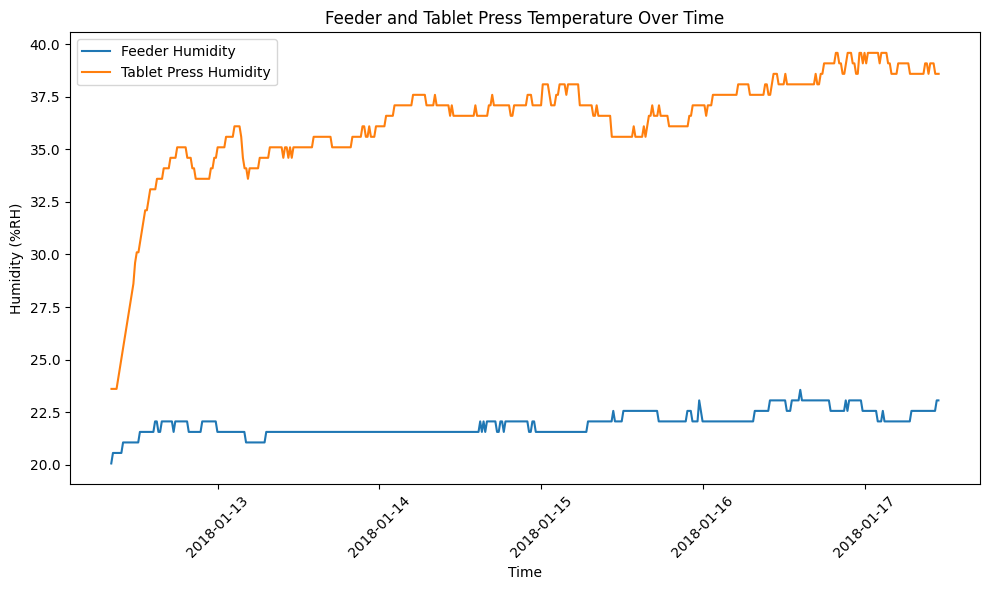

In [58]:
plt.figure(figsize=(10, 6))

# Plot for Feeders' Humidity
plt.plot(
    temperature_feeders["Timestamp"],
    temperature_feeders["Feeder_Temperature"],
    label="Feeder Humidity",
)

# Plot for Tablet Press Humidity
plt.plot(
    temperature_tablet_press["Timestamp"],
    temperature_tablet_press["Tablet_Press_Temperature"],
    label="Tablet Press Humidity",
)

# Labels and Title
plt.xlabel("Time")
plt.ylabel("Humidity (%RH)")
plt.title("Feeder and Tablet Press Temperature Over Time")
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# Tablet samples


In [59]:
tablet_samples = pd.read_excel(
    "MSD-Data-2024/MSOM data external sharing/Contextual quality data/RM Content Uniformity.xlsx",
    header=1,
)
tablet_samples

,Time,Sample,Tablet 1,Tablet 2,Tablet 3,Tablet 4,Tablet 5,Tablet 6,Tablet 7,Tablet 8,Tablet 9,Tablet 10,Unnamed: 12
0,2018-01-12 09:00:00,1,10.21902,10.173750,9.961281,10.1037,10.31806,10.098460,10.247000,10.007310,10.03426,10.06077,10.122361
1,2018-01-12 09:30:00,2,10.08629,10.082540,10.26188,10.12708,10.25302,10.240250,10.010450,10.149810,10.49131,10.01035,10.171298
2,2018-01-12 10:05:00,3,10.26451,9.943297,10.0002,9.947901,10.26186,10.004520,10.019650,10.219760,10.04153,10.09156,10.079479
3,2018-01-12 10:35:00,4,10.29434,10.202440,9.975531,10.46366,10.1725,10.127870,10.130460,10.014780,10.30276,10.20896,10.189330
4,2018-01-12 11:05:00,5,10.07056,10.199850,10.39272,9.994505,10.05464,9.959817,9.944490,9.894480,10.24687,10.02742,10.078535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2018-01-17 01:40:00,212,10.29222,10.175000,10.41051,10.25914,10.26444,10.388330,10.124190,10.288100,10.38965,10.24516,10.283674
212,2018-01-17 02:10:00,213,10.04575,10.256180,9.930577,9.95261,10.16918,9.954493,9.918083,9.968912,10.12383,10.04734,10.036696
213,2018-01-17 02:40:00,214,9.919049,10.167970,10.21796,10.23271,10.11817,10.332970,10.459530,10.386060,10.25748,9.945634,10.203753
214,2018-01-17 03:10:00,215,10.31725,9.983331,10.34502,10.22109,10.21125,10.333860,10.085400,10.338240,10.34406,10.11531,10.229481


In [87]:
tablet_samples.dtypes

Time           datetime64[ns]
Sample                  int64
Tablet 1               object
Tablet 2              float64
Tablet 3               object
Tablet 4               object
Tablet 5               object
Tablet 6              float64
Tablet 7              float64
Tablet 8              float64
Tablet 9              float64
Tablet 10              object
Unnamed: 12           float64
dtype: object

In [88]:
# tablet_samples.to_csv("data/processed/tablet_samples.csv", index=False)

# Tablet properties


In [60]:
# read MSD-Data-2024/MSOM data external sharing/Contextual quality data/RM Tablet Properties and Drum Change.xlsx
import pandas as pd

tablet_properties = pd.read_excel(
    "MSD-Data-2024/MSOM data external sharing/Contextual quality data/RM Tablet Properties and Drum Change.xlsx",
    header=1,
)
# tablet_properties_cleaned = tablet_properties
tablet_properties_cleaned = tablet_properties.dropna(how="all")
tablet_properties_cleaned

,Entered into the system,Avg weight [mg],SD weight,Avg thickness [mm],SD thickness,Avg hardness [kP],SD hardness
0,2018-01-12 08:57:00,403.2,1.2,4.68,0.01872,13.7,9.8
1,2018-01-12 09:16:00,400.8,1.5,4.66,0.01398,13.7,8.8
3,2018-01-12 09:32:00,399.8,1.5,4.65,0.01860,13.6,8.8
5,2018-01-12 09:45:00,398.9,1.8,4.64,0.00928,14.0,11.6
6,2018-01-12 10:01:00,395.8,1.6,4.63,0.01852,13.4,10.3
...,...,...,...,...,...,...,...
479,2018-01-17 09:45:00,398.9,1.4,4.60,0.01380,14.0,8.9
480,2018-01-17 10:00:00,400.8,1.8,4.61,0.01383,14.3,8.6
481,2018-01-17 10:15:00,403.7,0.9,4.61,0.01383,14.9,6.7
482,2018-01-17 10:30:00,398.5,1.4,4.60,0.00920,13.9,8.7


In [89]:
tablet_properties_cleaned.dtypes

Entered into the system    datetime64[ns]
Avg weight [mg]                   float64
SD weight                         float64
Avg thickness [mm]                float64
SD thickness                      float64
Avg hardness [kP]                 float64
SD hardness                       float64
dtype: object

In [90]:
# tablet_properties_cleaned.to_csv("data/processed/tablet_properties.csv", index=False)

# Material proterties


In [61]:
material_properties = pd.read_excel(
    "MSD-Data-2024/MSOM data external sharing/Contextual quality data/RM Material Properties.xlsx",
)
material_properties

,Series Name,Material and Batch,"CBD, g/ml","BFE, mJ","CPS, % @ 0.500kPa","CPS, % @ 1.00kPa","CPS, % @ 2.00kPa","CPS, % @ 4.00kPa","CPS, % @ 6.00kPa","CPS, % @ 8.00kPa","CPS, % @ 10.0kPa","CPS, % @ 12.0kPa","CPS, % @ 15.0kPa","Cohesion, kPa","UYS, kPa","MPS, kPa",FF,"AIF, º"
0,Avicel PH102,71734C,0.373373,994.990300,2.307680,3.368672,4.984254,6.550991,7.519613,8.197361,8.736365,9.219611,9.851903,0.290811,1.067690,10.184828,9.856499,32.684407
1,Avicel PH102,71732C,0.358039,1223.876000,2.393326,3.645108,5.468847,7.248890,8.299895,9.055432,9.665006,10.215942,10.915173,0.249862,0.914576,9.998014,11.343182,32.556360
2,L316FF,NaN,0.639176,1645.805333,1.809295,2.155597,2.876701,3.472807,3.864371,4.180937,4.458582,4.705388,5.054231,0.063235,0.216230,8.422396,42.011465,29.457770
3,pAPAP,NaN,Test failed,879.836600,3.506500,9.279069,17.414980,24.579247,28.253660,30.986857,32.825980,34.485777,36.465173,0.777838,3.003178,8.194056,2.761032,35.221917
4,Ac-Di-Sol,NaN,0.538863,1848.411667,1.301862,1.992271,3.276784,4.549440,5.408942,6.060221,6.545659,6.925738,7.480808,0.123525,0.587242,14.521330,26.975960,44.164720
5,Mag St,NaN,0.258549,122.982067,7.077436,12.512897,18.387740,23.638403,26.607103,28.824580,30.479687,31.842403,33.566720,0.461286,1.417721,9.030220,6.431006,23.898897


# Drum and Lot Change

In [62]:
drum_lot = pd.read_excel(
    "MSD-Data-2024/MSOM data external sharing/Contextual quality data/RM Tablet Properties and Drum Change.xlsx",
    header=1,
    sheet_name="Raw Material Drum change",
)
drum_lot

,Date/Time,Amount (kg),Lot,Est Refill time,Date/Time.1,Amount (kg).1,Lot.1,Est Refill time.1,Date/Time.2,Amount (kg).2,...,Drum #.1,Est Refill time.3,Date/Time.4,Amount (kg).4,Drum #.2,Est Refill time.4,Date/Time.5,Amount (kg).5,Drum #.3,Est Refill time.5
0,Total,611.053,NaN,NaN,NaT,60.9701,NaN,NaN,NaT,1816.044,...,NaN,NaN,NaT,1750.0,NaN,NaN,NaT,1693.766,NaN,NaN
1,2018-01-12 07:25:00,8.780,77.0,2018-01-12 09:30:00,2018-01-12 08:16:00,2.6930,bag 1,2018-01-12 11:30:00,2018-01-12 07:29:00,75.000,...,21928.0,2018-01-13 09:15:00,2018-01-12 07:35:00,50.0,20826.0,2018-01-12 11:30:00,2018-01-12 07:30:00,50.000,20649,2018-01-12 11:30:00
2,2018-01-12 09:38:00,8.900,77.0,2018-01-12 11:10:00,2018-01-12 11:00:00,1.7680,bag 1,2018-01-12 13:30:00,2018-01-12 13:02:00,75.000,...,21929.0,2018-01-13 12:00:00,2018-01-12 11:24:00,50.0,20869.0,2018-01-12 15:00:00,2018-01-12 11:35:00,50.000,20636,2018-01-12 15:00:00
3,2018-01-12 11:20:00,7.420,77.0,2018-01-12 13:50:00,2018-01-12 13:42:00,1.5550,bag 1,2018-01-12 16:30:00,2018-01-12 17:54:00,75.000,...,21931.0,2018-01-15 12:00:00,2018-01-12 14:50:00,50.0,20633.0,2018-01-12 18:50:00,2018-01-12 14:58:00,50.000,20634,2018-01-12 18:28:00
4,2018-01-12 12:48:00,9.920,80.0,2018-01-12 15:40:00,2018-01-12 16:30:00,0.7500,bag 1,2018-01-12 19:30:00,2018-01-13 02:03:00,75.000,...,21927.0,End,2018-01-12 18:17:00,50.0,20697.0,2018-01-12 22:17:00,2018-01-12 18:13:00,50.000,20631,2018-01-12 21:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2018-01-17 03:05:00,10.780,78.0,2018-01-17 05:10:00,NaT,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
66,2018-01-17 05:00:00,11.280,79.0,2018-01-17 07:05:00,NaT,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
67,2018-01-17 07:00:00,8.020,79.0,2018-01-17 08:30:00,NaT,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
68,2018-01-17 08:28:00,8.020,79.0,2018-01-17 10:00:00,NaT,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [63]:
drum_lot.dtypes

Date/Time                    object
Amount (kg)                 float64
Lot                         float64
Est Refill time              object
Date/Time.1          datetime64[ns]
Amount (kg).1               float64
Lot.1                        object
Est Refill time.1            object
Date/Time.2          datetime64[ns]
Amount (kg).2               float64
Drum #                      float64
Est Refill time.2            object
Date/Time.3          datetime64[ns]
Amount (kg).3               float64
Drum #.1                    float64
Est Refill time.3            object
Date/Time.4          datetime64[ns]
Amount (kg).4               float64
Drum #.2                    float64
Est Refill time.4            object
Date/Time.5          datetime64[ns]
Amount (kg).5               float64
Drum #.3                     object
Est Refill time.5            object
dtype: object

In [64]:
# Dropping the first row ('Total' row)
drum_lot = drum_lot.drop(0)

# Converting Date/Time columns to datetime
date_columns = [col for col in drum_lot.columns if "Date/Time" in col]
for col in date_columns:
    drum_lot[col] = pd.to_datetime(drum_lot[col])

# Converting Amount columns to numeric
amount_columns = [col for col in drum_lot.columns if "Amount (kg)" in col]
for col in amount_columns:
    drum_lot[col] = pd.to_numeric(drum_lot[col])

# Converting Lot columns to string
lot_columns = [col for col in drum_lot.columns if "Lot" in col]
for col in lot_columns:
    drum_lot[col] = drum_lot[col].astype(str)

In [65]:
drum_lot.dtypes

Date/Time            datetime64[ns]
Amount (kg)                 float64
Lot                          object
Est Refill time              object
Date/Time.1          datetime64[ns]
Amount (kg).1               float64
Lot.1                        object
Est Refill time.1            object
Date/Time.2          datetime64[ns]
Amount (kg).2               float64
Drum #                      float64
Est Refill time.2            object
Date/Time.3          datetime64[ns]
Amount (kg).3               float64
Drum #.1                    float64
Est Refill time.3            object
Date/Time.4          datetime64[ns]
Amount (kg).4               float64
Drum #.2                    float64
Est Refill time.4            object
Date/Time.5          datetime64[ns]
Amount (kg).5               float64
Drum #.3                     object
Est Refill time.5            object
dtype: object

In [66]:
drum_lot

,Date/Time,Amount (kg),Lot,Est Refill time,Date/Time.1,Amount (kg).1,Lot.1,Est Refill time.1,Date/Time.2,Amount (kg).2,...,Drum #.1,Est Refill time.3,Date/Time.4,Amount (kg).4,Drum #.2,Est Refill time.4,Date/Time.5,Amount (kg).5,Drum #.3,Est Refill time.5
1,2018-01-12 07:25:00,8.780,77.0,2018-01-12 09:30:00,2018-01-12 08:16:00,2.693,bag 1,2018-01-12 11:30:00,2018-01-12 07:29:00,75.0,...,21928.0,2018-01-13 09:15:00,2018-01-12 07:35:00,50.0,20826.0,2018-01-12 11:30:00,2018-01-12 07:30:00,50.0,20649,2018-01-12 11:30:00
2,2018-01-12 09:38:00,8.900,77.0,2018-01-12 11:10:00,2018-01-12 11:00:00,1.768,bag 1,2018-01-12 13:30:00,2018-01-12 13:02:00,75.0,...,21929.0,2018-01-13 12:00:00,2018-01-12 11:24:00,50.0,20869.0,2018-01-12 15:00:00,2018-01-12 11:35:00,50.0,20636,2018-01-12 15:00:00
3,2018-01-12 11:20:00,7.420,77.0,2018-01-12 13:50:00,2018-01-12 13:42:00,1.555,bag 1,2018-01-12 16:30:00,2018-01-12 17:54:00,75.0,...,21931.0,2018-01-15 12:00:00,2018-01-12 14:50:00,50.0,20633.0,2018-01-12 18:50:00,2018-01-12 14:58:00,50.0,20634,2018-01-12 18:28:00
4,2018-01-12 12:48:00,9.920,80.0,2018-01-12 15:40:00,2018-01-12 16:30:00,0.750,bag 1,2018-01-12 19:30:00,2018-01-13 02:03:00,75.0,...,21927.0,End,2018-01-12 18:17:00,50.0,20697.0,2018-01-12 22:17:00,2018-01-12 18:13:00,50.0,20631,2018-01-12 21:43:00
5,2018-01-12 14:55:00,11.340,80.0,2018-01-12 17:00:00,2018-01-12 21:17:00,1.388,bag 1,2018-01-12 22:50:00,2018-01-13 08:08:00,75.0,...,NaN,NaN,2018-01-13 00:19:00,50.0,20632.0,2018-01-13 04:19:00,2018-01-13 00:27:00,50.0,20591,2018-01-13 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2018-01-17 03:05:00,10.780,78.0,2018-01-17 05:10:00,NaT,NaN,nan,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
66,2018-01-17 05:00:00,11.280,79.0,2018-01-17 07:05:00,NaT,NaN,nan,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
67,2018-01-17 07:00:00,8.020,79.0,2018-01-17 08:30:00,NaT,NaN,nan,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
68,2018-01-17 08:28:00,8.020,79.0,2018-01-17 10:00:00,NaT,NaN,nan,NaN,NaT,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [67]:
# Creating a list of materials
materials = [
    "API",
    "Magnesium Stearate",
    "Lactose (Lot = 85170761)",
    "Ac-Di-Sol (Crosscarmellose)",
    "Avicel 102 (PD 1) - (Lot = 71734C)",
    "Avicel 102 (PD 4) - (Lot = 71734C)",
]

# Dictionary to store individual dataframes for each material
material_dataframes = {}

# Splitting drum_lot DataFrame into columns for each material
# Assuming each set of columns (Date/Time, Amount, Lot, etc.) corresponds to a different material
for i, material in enumerate(materials):
    material_df = drum_lot.iloc[
        :, i * 4 : (i + 1) * 4
    ].copy()  # Extract 4 columns per material (Date/Time, Amount, Lot, Est Refill)
    material_df.columns = [
        "Date/Time",
        "Amount (kg)",
        "Lot",
        "Est Refill time",
    ]  # Assign appropriate column names
    material_dataframes[material] = (
        material_df  # Save the material dataframe to the dictionary
    )

## API

In [68]:
drum_lot_API = material_dataframes["API"]
drum_lot_API

,Date/Time,Amount (kg),Lot,Est Refill time
1,2018-01-12 07:25:00,8.780,77.0,2018-01-12 09:30:00
2,2018-01-12 09:38:00,8.900,77.0,2018-01-12 11:10:00
3,2018-01-12 11:20:00,7.420,77.0,2018-01-12 13:50:00
4,2018-01-12 12:48:00,9.920,80.0,2018-01-12 15:40:00
5,2018-01-12 14:55:00,11.340,80.0,2018-01-12 17:00:00
...,...,...,...,...
65,2018-01-17 03:05:00,10.780,78.0,2018-01-17 05:10:00
66,2018-01-17 05:00:00,11.280,79.0,2018-01-17 07:05:00
67,2018-01-17 07:00:00,8.020,79.0,2018-01-17 08:30:00
68,2018-01-17 08:28:00,8.020,79.0,2018-01-17 10:00:00


In [91]:
# drum_lot_API.to_csv("data/processed/drum_lot_API.csv", index=False)

## Magnesium Stearate

In [69]:
drum_lot_Magnesium_Stearate = material_dataframes["Magnesium Stearate"]
drum_lot_Magnesium_Stearate = drum_lot_Magnesium_Stearate.dropna()
drum_lot_Magnesium_Stearate

,Date/Time,Amount (kg),Lot,Est Refill time
1,2018-01-12 08:16:00,2.6930,bag 1,2018-01-12 11:30:00
2,2018-01-12 11:00:00,1.7680,bag 1,2018-01-12 13:30:00
3,2018-01-12 13:42:00,1.5550,bag 1,2018-01-12 16:30:00
4,2018-01-12 16:30:00,0.7500,bag 1,2018-01-12 19:30:00
5,2018-01-12 21:17:00,1.3880,bag 1,2018-01-12 22:50:00
6,2018-01-12 23:23:00,1.0000,bag 1,2018-01-13 01:00:00
7,2018-01-13 01:54:00,1.1200,bag 1,2018-01-13 06:00:00
8,2018-01-13 05:45:00,0.9000,bag 1,2018-01-13 10:00:00
9,2018-01-13 10:34:00,1.0000,bag 1,2018-01-13 12:30:00
10,2018-01-13 00:29:00,1.0800,bag 1,2018-01-13 14:30:00


In [92]:
# drum_lot_Magnesium_Stearate.to_csv(
#     "data/processed/drum_lot_Magnesium_Stearate.csv", index=False
# )

## Lactose

In [70]:
drum_lot_latcose = material_dataframes["Lactose (Lot = 85170761)"]
drum_lot_latcose = drum_lot_latcose.dropna()
drum_lot_latcose

,Date/Time,Amount (kg),Lot,Est Refill time
1,2018-01-12 07:29:00,75.000,162.0,2018-01-12 13:15:00
2,2018-01-12 13:02:00,75.000,179.0,2018-01-12 13:15:00
3,2018-01-12 17:54:00,75.000,192.0,2018-01-13 01:15:00
4,2018-01-13 02:03:00,75.000,180.0,2018-01-13 07:15:00
5,2018-01-13 08:08:00,75.000,177.0,2018-01-13 14:15:00
6,2018-01-13 14:26:00,75.000,198.0,2018-01-13 19:45:00
7,2018-01-13 19:26:00,75.000,199.0,2018-01-13 23:30:00
8,2018-01-14 01:21:00,75.000,82.0,2018-01-14 06:30:00
9,2018-01-14 06:40:00,75.000,197.0,2018-01-14 11:50:00
10,2018-01-14 11:55:00,75.000,176.0,2018-01-14 16:30:00


In [93]:
# drum_lot_latcose.to_csv("data/processed/drum_lot_latcose.csv", index=False)

## Ac-Di-Sol

In [71]:
drum_lot_Ac_Di_Sol = material_dataframes["Ac-Di-Sol (Crosscarmellose)"]
drum_lot_Ac_Di_Sol = drum_lot_Ac_Di_Sol.dropna()
drum_lot_Ac_Di_Sol

,Date/Time,Amount (kg),Lot,Est Refill time
1,2018-01-12 07:29:00,41.760,21928.0,2018-01-13 09:15:00
2,2018-01-12 21:44:00,50.000,21929.0,2018-01-13 12:00:00
3,2018-01-14 16:44:00,50.000,21931.0,2018-01-15 12:00:00
4,2018-01-15 20:34:00,40.113,21927.0,End


In [94]:
# drum_lot_Ac_Di_Sol.to_csv("data/processed/drum_lot_Ac_Di_Sol.csv", index=False)

## Avicel 102 (PD 1) - (Lot = 71734C)

In [72]:
drum_lot_Avicel_102_PD1 = material_dataframes["Avicel 102 (PD 1) - (Lot = 71734C)"]
drum_lot_Avicel_102_PD1 = drum_lot_Avicel_102_PD1.dropna()
drum_lot_Avicel_102_PD1

,Date/Time,Amount (kg),Lot,Est Refill time
1,2018-01-12 07:35:00,50.0,20826.0,2018-01-12 11:30:00
2,2018-01-12 11:24:00,50.0,20869.0,2018-01-12 15:00:00
3,2018-01-12 14:50:00,50.0,20633.0,2018-01-12 18:50:00
4,2018-01-12 18:17:00,50.0,20697.0,2018-01-12 22:17:00
5,2018-01-13 00:19:00,50.0,20632.0,2018-01-13 04:19:00
6,2018-01-13 05:40:00,50.0,20593.0,2018-01-13 07:40:00
7,2018-01-13 08:10:00,50.0,20648.0,2018-01-13 12:40:00
8,2018-01-13 12:50:00,50.0,20594.0,2018-01-13 16:20:00
9,2018-01-13 16:15:00,50.0,20824.0,2018-01-13 19:45:00
10,2018-01-13 19:49:00,50.0,20827.0,2018-01-13 23:15:00


In [95]:
# drum_lot_Avicel_102_PD1.to_csv("data/processed/drum_lot_Avicel_102_PD1.csv", index=False)

## Avicel 102 (PD 4) - (Lot = 71734C)

In [73]:
drum_lot_Avicel_102_PD4 = material_dataframes["Avicel 102 (PD 4) - (Lot = 71734C)"]
drum_lot_Avicel_102_PD4 = drum_lot_Avicel_102_PD4.dropna()
drum_lot_Avicel_102_PD4

,Date/Time,Amount (kg),Lot,Est Refill time
1,2018-01-12 07:30:00,50.000,20649,2018-01-12 11:30:00
2,2018-01-12 11:35:00,50.000,20636,2018-01-12 15:00:00
3,2018-01-12 14:58:00,50.000,20634,2018-01-12 18:28:00
4,2018-01-12 18:13:00,50.000,20631,2018-01-12 21:43:00
5,2018-01-13 00:27:00,50.000,20591,2018-01-13 04:00:00
6,2018-01-13 05:42:00,50.000,20592,2018-01-13 09:15:00
7,2018-01-13 09:33:00,50.000,20642,2018-01-13 13:05:00
8,2018-01-13 13:15:00,50.000,20775,2018-01-13 16:45:00
9,2018-01-13 16:22:00,50.000,20825,2018-01-13 19:46:00
10,2018-01-13 19:54:00,50.000,20823,2018-01-13 23:00:00


In [96]:
# drum_lot_Avicel_102_PD4.to_csv("data/processed/drum_lot_Avicel_102_PD4.csv", index=False)

# fd1_fd2_lots

In [75]:
fd1_fd2_copy = fd1_fd2.copy()

In [77]:
fd1_fd2_copy

,TimeStamp,Feed Factor PD1,Feed Factor PD2,Feed Factor PD3,Feed Factor PD4,Feed Factor PD5,Feed Factor PD7,Screw RPM PD1,Screw RPM PD2,Screw RPM PD3,...,Net Weight PD3,Net Weight PD4,Net Weight PD5,Net Weight PD7,Totalizer PD1,Totalizer PD2,Totalizer PD3,Totalizer PD4,Totalizer PD5,Totalizer PD7
0,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,0.42855,0.52050,0.88230,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
1,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,0.42855,0.52045,0.88225,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
2,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,0.42855,0.52050,0.88230,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
3,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,0.42855,0.52050,0.88230,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
4,2018-01-12 08:43:00,1.3334,1.9152,1.3027,1.3089,1.1295,0.83728,0.0000,0.0000,0.0000,...,0.42855,0.52050,0.88225,0.40355,2.5048,2.5454,0.87711,2.5031,0.26459,0.072622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439841,2018-01-17 11:01:00,1.2730,1.7314,1.0819,1.3218,1.1042,0.80946,203.6408,152.4236,83.4518,...,0.42515,0.41360,0.68180,0.38745,754.1812,759.0052,266.00200,758.0178,131.07200,65.536000
439842,2018-01-17 11:01:00,1.2785,1.7333,1.0896,1.3273,1.1048,0.80929,203.3338,153.1399,83.1960,...,0.42350,0.40975,0.68130,0.38775,754.1844,759.0084,266.00200,758.0245,131.07200,65.536000
439843,2018-01-17 11:01:00,1.2590,1.7341,1.0873,1.3227,1.1057,0.81131,207.0689,153.2423,84.9356,...,0.42230,0.40570,0.68095,0.38745,754.1912,759.0153,266.00200,758.0314,131.07200,65.536000
439844,2018-01-17 11:01:00,1.2684,1.7312,1.0874,1.3188,1.1067,0.81018,205.4316,152.6283,84.3728,...,0.42030,0.40055,0.68030,0.38700,754.1981,759.0221,266.00200,758.0385,131.07200,65.536000


In [80]:
fd1_fd2_copy.columns

Index(['TimeStamp', 'Feed Factor PD1', 'Feed Factor PD2', 'Feed Factor PD3',
       'Feed Factor PD4', 'Feed Factor PD5', 'Feed Factor PD7',
       'Screw RPM PD1', 'Screw RPM PD2', 'Screw RPM PD3', 'Screw RPM PD4',
       'Screw RPM PD5', 'Screw RPM PD7', 'VolMode PD1', 'VolMode PD2',
       'VolMode PD3', 'VolMode PD4', 'VolMode PD5', 'VolMode PD7',
       'Massflow PD 1', 'Massflow PD 2', 'Massflow PD 3', 'Massflow PD 4',
       'Massflow PD 5', 'Massflow PD 7', '%  PD1', '%  PD2', '%  PD3',
       '%  PD4', '%  PD5', '%  PD7', 'Estimated weight IBC PS1',
       'Estimated weight IBC PS2', 'Estimated weight IBC PS3',
       'Estimated weight IBC PS4', 'Estimated weight IBC PS5',
       'Estimated weight IBC PS7', 'RefAct PD1', 'RefAct PD2', 'RefAct PD3',
       'RefAct PD4', 'RefAct PD5', 'RefAct PD7', 'Net Weight PD1',
       'Net Weight PD2', 'Net Weight PD3', 'Net Weight PD4', 'Net Weight PD5',
       'Net Weight PD7', 'Totalizer PD1', 'Totalizer PD2', 'Totalizer PD3',
       'To

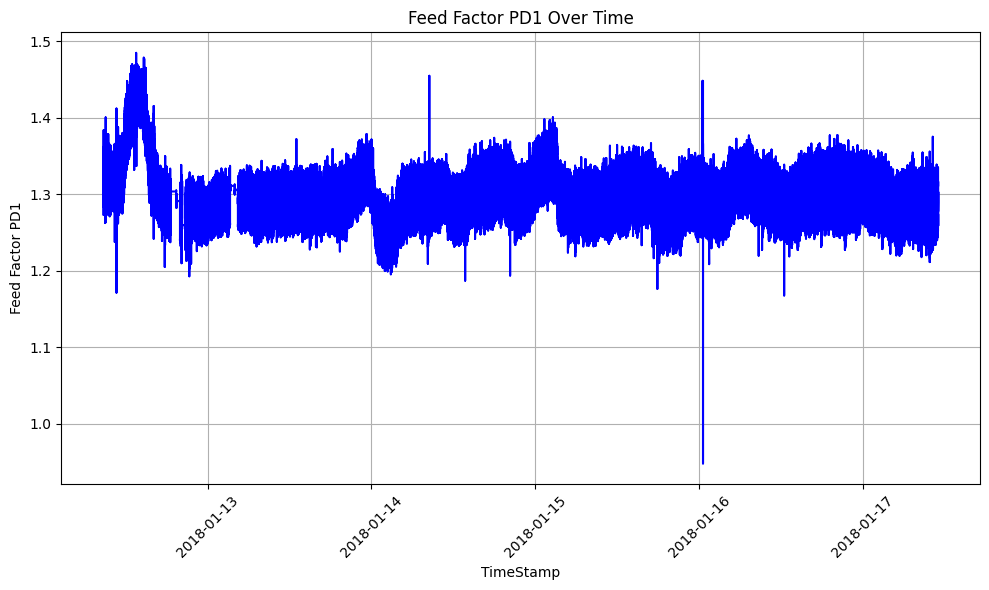

In [79]:
# Plotting the Feed Factor PD1 against TimeStamp
plt.figure(figsize=(10, 6))
plt.plot(
    fd1_fd2_copy["TimeStamp"], fd1_fd2_copy["Feed Factor PD1"], linestyle="-", color="b"
)
plt.title("Feed Factor PD1 Over Time")
plt.xlabel("TimeStamp")
plt.ylabel("Feed Factor PD1")
plt.grid(True)
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
# Extending the function to handle all timestamps, including those not directly in the time range, by carrying forward the last known lot
def assign_lot_extended(timestamp):
    for i, row in drum_lot_API.iterrows():
        if (
            row["Date/Time"]
            <= timestamp
            < (
                drum_lot_API.iloc[i + 1]["Date/Time"]
                if i + 1 < len(drum_lot_API)
                else pd.Timestamp.max
            )
        ):
            return row["Lot"]
    return None


# Applying the extended function to fd1_fd2_copy dataframe
fd1_fd2_copy["Lot"] = fd1_fd2_copy["TimeStamp"].apply(assign_lot_extended)